In [18]:
import tensorflow as tf
import tensorflow.keras as K
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# loading model
jsonFile = open('models/cats_vs_dogs-model-2-regularized.json', 'r')
loadedJSONModel = jsonFile.read()
jsonFile.close()
model = K.models.model_from_json(loadedJSONModel)

# loading weights using this model
model.load_weights('models/cats_vs_dogs_weights-model-2-regularized.h5')

In [43]:
def getImageTensorFromFile(filename):
    img = cv2.imread(filename)
    imgCopy = img.copy()
    imgCopy = cv2.resize(imgCopy, (200, 200))
    imgCopy = imgCopy/255.
    imgCopy = np.expand_dims(imgCopy, axis = 0)
    imgTensor = tf.convert_to_tensor(imgCopy)
    
    return img, imgTensor

In [44]:
img, imgTensor = getImageTensorFromFile('images/dog1.jpeg')

In [45]:
def catOrDog(image, prediction):
    if np.argmax(prediction) == 0:
        print('It is a cat')
    else:
        print('It is a dog')
        
    plt.imshow(image)

It is a dog


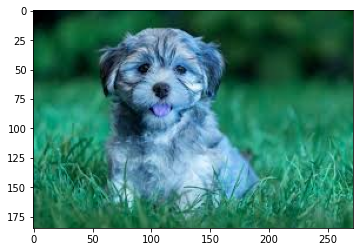

In [46]:
prediction = model.predict(imgTensor, steps = 1)
catOrDog(img, prediction)

In [47]:
img, imgTensor = getImageTensorFromFile('images/cat1.jpeg')

It is a cat


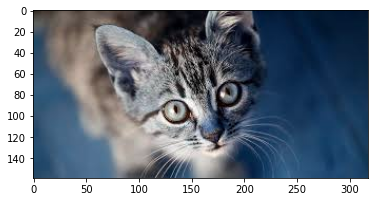

In [48]:
prediction = model.predict(imgTensor, steps = 1)
catOrDog(img, prediction)

It is a cat


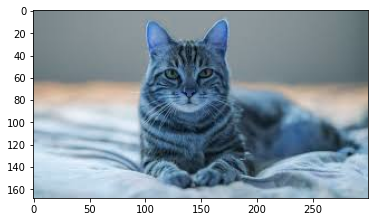

In [49]:
img, imgTensor = getImageTensorFromFile('images/cat2.jpeg')
prediction = model.predict(imgTensor, steps = 1)
catOrDog(img, prediction)

It is a dog


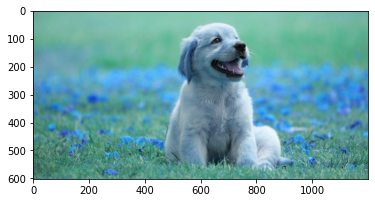

In [50]:
img, imgTensor = getImageTensorFromFile('images/dog2.jpg')
prediction = model.predict(imgTensor, steps = 1)
catOrDog(img, prediction)

It is a dog


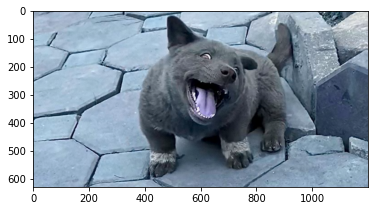

In [53]:
img, imgTensor = getImageTensorFromFile('images/dog_cat_hybrid.png')
prediction = model.predict(imgTensor, steps = 1)
catOrDog(img, prediction)